# Clasificando imágenes MNIST

Vamos a utilizar la red neuronal que desarrollamos para clasificar imágenes de números escritos a mano. La base de datos que usaremos se llama [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

## Descargando datos

Vamos a descargar el set de datos desde la librería [scikit-learn](https://scikit-learn.org/stable/).

In [1]:
##importamos librerías a utilizar

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
data, y = mnist["data"].values, mnist["target"].to_numpy()

### Analizando los datos

Siempre es importante analizar qué datos tenemos, en este caso, vamos a hacer una rápida revisión para entender qué tipo de información estamos queriendo clasificar.

In [3]:
print(data.shape)
print(y.shape)

(70000, 784)
(70000,)


De lo anterior podemos ver que tenemos $70mil$ instancias o datos, donde cada una de estas posee $784$ *características*.

También podemos ver que tenemos $70mil$ etiquetas (variable $y$). Veamos qué contiene esta última.

In [4]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [5]:
##convierto las etiquetas a enteros
y = y.astype(np.uint8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

La variable $y$ contiene *las etiquetas* de cada número dentro de $X$.

In [6]:
print(data[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Vemos que las características de cada instancia son vectores con valores enteros entre 0 y 255.

Vamos a normalizar estos valores entre 0 y 1 para facilitar luego el entrenamiento de la red.

In [7]:
X = data.astype('float32')/255

Podemos graficas algunos de estos números, veamos.

In [8]:
def plotSomeNumbers(numbers, rows = 5, cols = 5, figsize=(6, 6), cmap='viridis', title="Some numbers"):
    plt.figure(figsize=figsize)
    plt.title(title)
    for i in range(rows*cols):
        plt.subplot(rows, cols, i + 1)
        image = numbers[i].reshape(28,28)
        plt.imshow(image, cmap=cmap)
        plt.axis('off')
    plt.show()

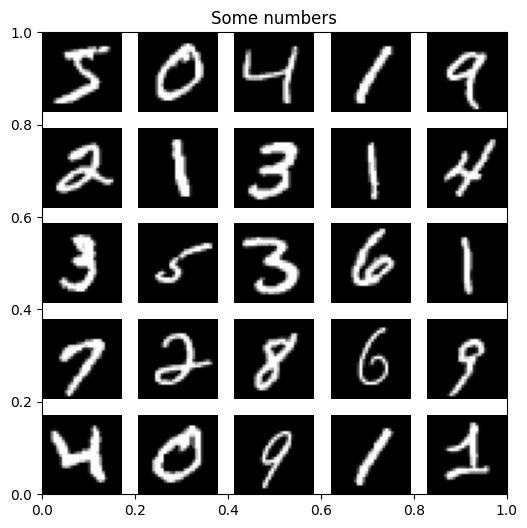

In [9]:
plotSomeNumbers(X, cmap="gray")

Para graficar lo anterior hemos tomado las 25 primeras instancias. A cada instancia le hemos aplicado un *.reshape* para formar una matriz de $28\times28$ la cual usamos para graficar.

Con esto podemos ver algunos números.

Supongamos que quisieramos ver 25 números $9$, sólo para ver diferencias entre estos.

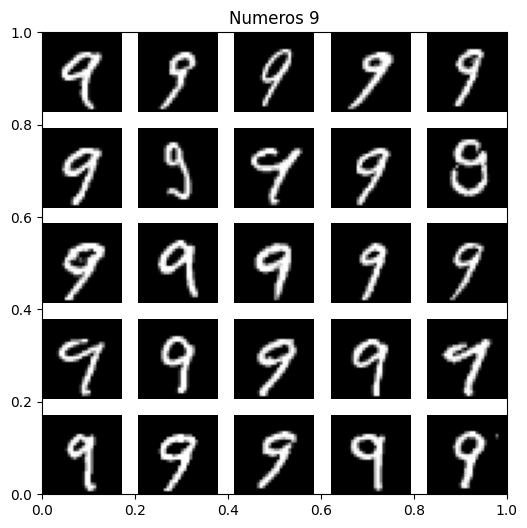

In [10]:
X_9 = X[(y==9)]

plotSomeNumbers(X_9, cmap='gray', title="Numeros 9")

## Generando nuestra red

A continuación vamos a usar nuestra clase *ANN* para armar una arquitectura sencilla para clasificar los números dentro del set de datos.

In [11]:
from Layers import Input, Dense
from ANN import NeuralNetwork
from loss_functions import mse, mse_prima
from activationsFunctions import *

input_layer = Input(n_neuronas=(784,))
hidden_layer1 = Dense(ninputs=784, noutputs=100, activation=tanh, activation_prima=tanh_prima,
                      weights_init="uniform", bias_init="zeros", name="DenseLayer1",random_seed=0)

hidden_layer2 = Dense(ninputs=100, noutputs=50, activation=tanh, activation_prima=tanh_prima,
                      weights_init="uniform", bias_init="zeros", name="DenseLayer2",random_seed=0)

output_layer = Dense(ninputs=50, noutputs=1, activation=sigmoid, activation_prima=sigmoid_prima,
                     weights_init="uniform", bias_init="zeros", name="OutputLayer",random_seed=0)

layers = [input_layer,hidden_layer1,hidden_layer2,output_layer] ##lista con mis capas
nn1 = NeuralNetwork(layers) ##creamos la red

nn1.use(loss=mse, loss_prima=mse_prima) ##definimos la función de pérdida

### Preparando los datos

Ahora vamos a preparar los datos para poder clasificar números 5 vs el resto de los números.

In [12]:
filtro_y5 = y==5 ##filtro para obtener los 5
##obtengo un nuevo array y con 1 si es 5 y 0 si no
y5 = np.where(filtro_y5,1,0)
y5 = y5.reshape(-1,1)
y5

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [13]:
##me quedo con 5mil datos de X e y5 de manera aleatoria y estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y5, test_size=0.3, stratify=y5)

In [163]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(49000, 784) (49000, 1)
(21000, 784) (21000, 1)


In [164]:
##analizo las proporciones de 5 en los conjuntos de entrenamiento y test
print(np.mean(y_train).round(3))
print(np.mean(y_test).round(3))

0.09
0.09


In [165]:
##analizamos cuantos 5 y cuantos números diferentes de 5 hay en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
##analizamos cuantos 5 y cuantos números diferentes de 5 hay en el conjunto de test
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{0: 44581, 1: 4419}
{0: 19106, 1: 1894}


Hemos generado dos nuevos sets y dos nuevos arrays de etiquetas. Uno de estos usaremos para entrenar la red y el otro para testear que tan bien funciona la misma.

In [166]:
nn1.train(X_train, y_train, learning_rate=0.01, epochs=500, tolerancia=1e-3, imprimir_cada=10, batch_size=int(0.05*X_train.shape[0]))

Época 0, MSE: 0.3287450146203433
Época 10, MSE: 0.09868511643560132
Época 20, MSE: 0.07983062871420632
Época 30, MSE: 0.08267906123878627
Época 40, MSE: 0.087362378188032
Época 50, MSE: 0.08121569110758371
Época 60, MSE: 0.08209339459413993
Época 70, MSE: 0.08510569968794396
Época 80, MSE: 0.07751188025921953
Época 90, MSE: 0.07644071973294507
Época 100, MSE: 0.06558191266622643
Época 110, MSE: 0.06227975328076707
Época 120, MSE: 0.06492025730723745
Época 130, MSE: 0.056634522217654734
Época 140, MSE: 0.05987701734141777
Época 150, MSE: 0.0592793766591125
Época 160, MSE: 0.054919520123610635
Época 170, MSE: 0.05336573867206153
Época 180, MSE: 0.058320551985764364
Época 190, MSE: 0.04827760038075708
Época 200, MSE: 0.053941062479728845
Época 210, MSE: 0.05026907797312781
Época 220, MSE: 0.05347602322922397
Época 230, MSE: 0.05090500496456929
Época 240, MSE: 0.04795855073163777
Época 250, MSE: 0.045584128658189206
Época 260, MSE: 0.03831683408122795
Época 270, MSE: 0.04639977258997134
Ép

### Evaluando la performance de la red

Una vez entrenada la red, vamos a analizar qué tan bien clasifica sobre los datos de testeo.

In [167]:
y_pred = nn1.classify(X_test)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [168]:
##obtengo algunas métricas como accuracy, precision, recall y f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred).round(3))

print("Recall: ", recall_score(y_test, y_pred).round(3))
print("F1: ", f1_score(y_test, y_pred).round(3))

Accuracy:  0.9552380952380952
Precision:  0.84
Recall:  0.622
F1:  0.715


Algunos comentarios sobre algunas métricas anteriores.

**Precisión**

- La precisión mide la proporción de instancias clasificadas como positivas por el modelo que son realmente positivas.
- Su fórmula es:

$$ \frac{TP}{TP+FP} $$
- Una alta presición significa que cuando la red clasifica algo como positivo, es probable que sea correcto.

**Recall (sensibilidad)**

- El recall mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
- Se define como:

$$ \frac{TP}{TP+FN} $$

- Una alta sensibilidad significa que el modelo es capaz de identificar correctamente la mayoría de las instancias positivas.

#### Matrices de confusión

Ahora vamos a generar una matriz de confusión.

Pueden leer más sobre esto [aca](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) y [aca](https://en.wikipedia.org/wiki/Confusion_matrix).

In [129]:
##matriz de confusión
tp = np.sum((y_test==1) & (y_pred==1))
tn = np.sum((y_test==0) & (y_pred==0))
fp = np.sum((y_test==0) & (y_pred==1))
fn = np.sum((y_test==1) & (y_pred==0))

mc = np.array([[tp,fn],[fp,tn]])
#normalizo la matriz de confusión. La normalización se hace dividiendo cada elemento por la suma de la columna
mc_norm = mc/mc.sum(axis=0)

print(mc)
print(mc_norm.round(3)) 

[[ 1179   715]
 [  225 18881]]
[[0.84  0.036]
 [0.16  0.964]]


Grafiquemos la matriz de confusión

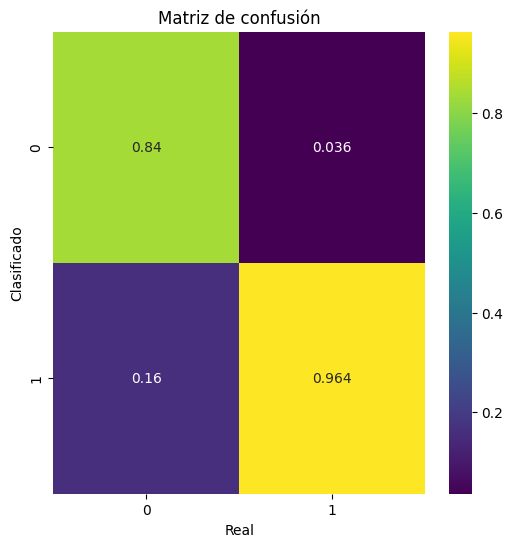

In [130]:
plt.figure(figsize=(6,6))
sns.heatmap(mc_norm.round(3), annot=True, cmap='viridis', fmt='g')
plt.xlabel('Real')
plt.ylabel('Clasificado')
plt.title('Matriz de confusión')
plt.show() 

¿Qué podemos decir de nuestro modelo?

Veamos aquellos números que ha confundido la red.

Primero, veamos los falsos positivos.

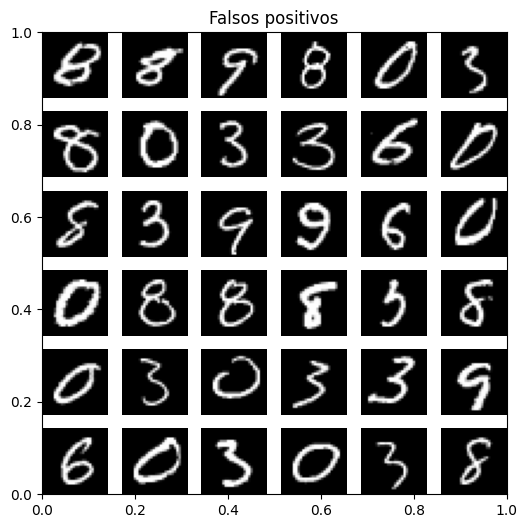

In [131]:
filtro = ((y_test==0) & (y_pred==1)).reshape(len(X_test))
X_test_fp = X_test[filtro,:]
plotSomeNumbers(X_test_fp, cmap='gray', rows=6, cols=6, title="Falsos positivos")

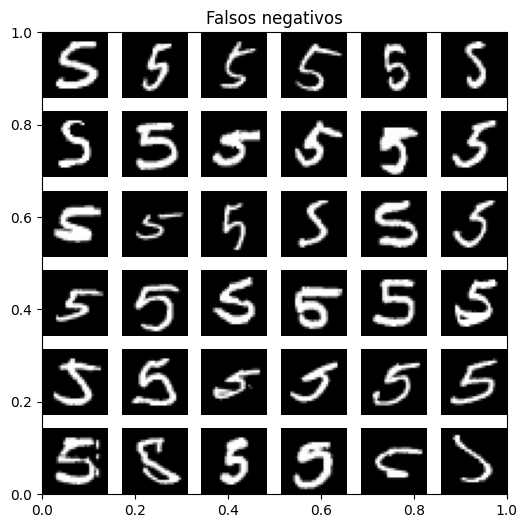

In [132]:
##grafico para falsos negativos
filtro = ((y_test==1) & (y_pred==0)).reshape(len(X_test))
X_test_fn = X_test[filtro,:]
plotSomeNumbers(X_test_fn, cmap='gray', rows=6, cols=6, title="Falsos negativos")

### Mejorando la precisión de clasificación

Debemos tener en cuenta que nuestra red nos retorna valores entre $0$ y $1$ para cada predicción, esto se corresponde con un valor de probabilidad. Mientras más cercano a $1$ estemos, más *segura* está la red neuronal de decir que el dato se corresponde a un número $5$.

En general, se asume que todos los valores de probabilidad por encima de $0.5$, es decir, $50\%$ se corresponden a predicciones de la clase de interés. En nuestro contexto, podríamos asumir que los valores de probabilidad por encima de $0.5$ son consideradons números $5$ y el resto, que esté por debajo, no.

Aumentar la presición implica **disminuir el umbral** ya que de esta forma más instancias son clasificadas como *positivas*, en nuestro contexto, sería que son clasificadas como un número $5$.

In [143]:
def evaluar_umbral(y_true, y_prob, umbral=0.5):
    """
    Evaluamos la precisión y sensibilidad para un umbral de decisión dado.

    Args:
    - y_true (array): etiquetas verdaderas
    - y_prob (array): probabilidades de la red
    - umbral (float): umbral de decisión
    
    Returns:
    - precision, recall: precisión y sensibilidad para el umbral dado
    """
    # Contertimos las probabilidades en etiquetas
    y_pred = (y_prob >= umbral).astype(int)
    
    # Calcular precisión y sensibilidad
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    return precision, recall

In [169]:
##obtengo las probabilidades de la red
y_probs = nn1.predict(X_test)

array([1])

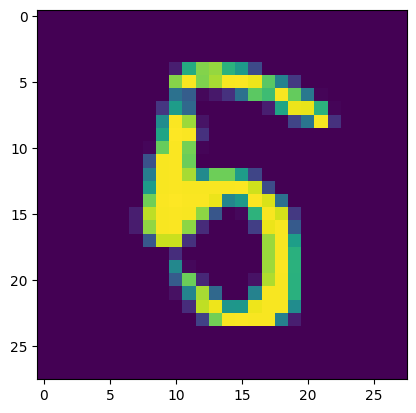

In [177]:
y_probs[:12]
plt.imshow(X_test[7].reshape(28,28))
y_test[7]

In [183]:
# Probar diferentes umbrales
precistions = []
recalls = []
for umbral in np.arange(0.1, 1.0, 0.1):
    precision, recall = evaluar_umbral(y_test, y_probs, umbral)
    # print(f"Umbral: {umbral:.1f} | Precisión: {precision:.3f} | Sensibilidad: {recall:.3f}")
    precistions.append(precision)
    recalls.append(recall)

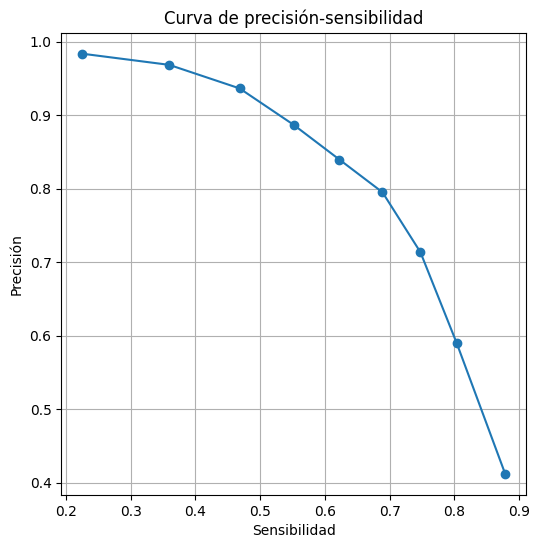

In [185]:
##grafico la curva de precisión y sensibilidad
plt.figure(figsize=(6,6))
plt.plot(recalls, precistions, 'o-')
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.title('Curva de precisión-sensibilidad')
plt.grid()
plt.show()

La curva de *precisión vs sensibilidad* muestra cómo varía la precisión (aquellas instancias que son positivas y que fueron correctamente predichos como positivos) respecto a la sensibilidad (positivos predichos correctamente entre todos los positivos reales).

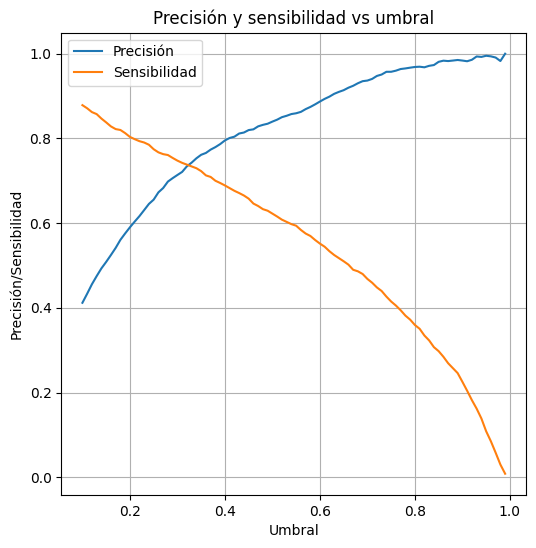

In [147]:
##curvas de precisión y sensibilidad vs umbral
plt.figure(figsize=(6,6))
plt.plot(np.arange(0.1, 1.0, 0.01), precistions, label='Precisión')
plt.plot(np.arange(0.1, 1.0, 0.01), recalls, label='Sensibilidad')
plt.xlabel('Umbral')
plt.ylabel('Precisión/Sensibilidad')
plt.title('Precisión y sensibilidad vs umbral')
plt.legend()
plt.grid()
plt.show()

Vamos a elegir un umbral diferente a $0.5$ para ver qué impacto tiene esto sobre las clasificaciones.

In [188]:
y_pred_umbral = (y_probs >= 0.2).astype(int)

##genero la matriz de confusión
tp = np.sum((y_test==1) & (y_pred_umbral==1))
tn = np.sum((y_test==0) & (y_pred_umbral==0))
fp = np.sum((y_test==0) & (y_pred_umbral==1))
fn = np.sum((y_test==1) & (y_pred_umbral==0))

mc = np.array([[tn,fn],[fp,tp]])
mc_norm = mc/mc.sum(axis=0)

print(mc)
print(mc_norm.round(3))

[[18049   372]
 [ 1057  1522]]
[[0.945 0.196]
 [0.055 0.804]]


Text(0.5, 1.0, 'Matriz de confusión')

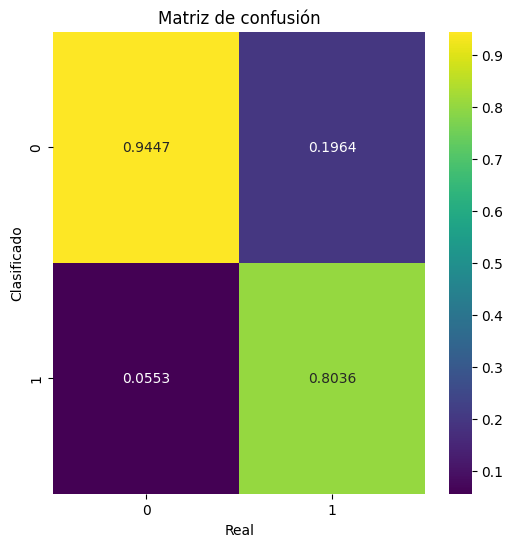

In [189]:
##grafico la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(mc_norm.round(4), annot=True, cmap='viridis', fmt='g')
plt.xlabel('Real')
plt.ylabel('Clasificado')
plt.title('Matriz de confusión')

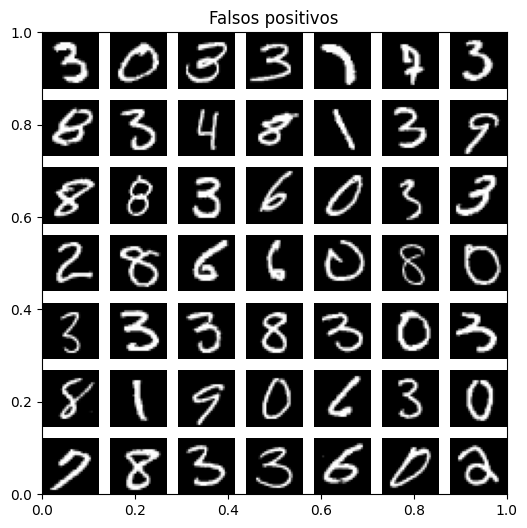

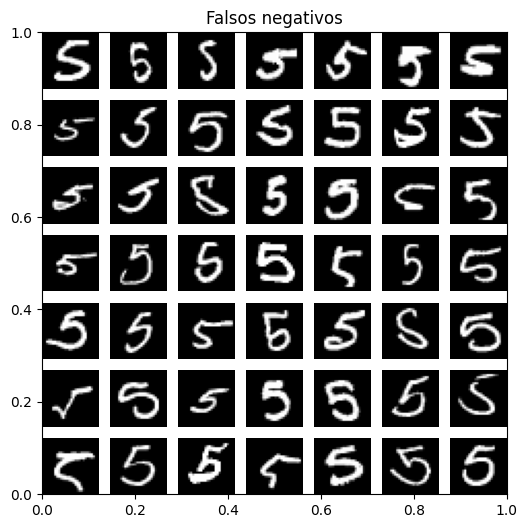

In [190]:
##graficos para falsos positivos y falsos negativos
filtro = ((y_test==0) & (y_pred_umbral==1)).reshape(len(X_test))
X_test_fp = X_test[filtro,:]
plotSomeNumbers(X_test_fp, cmap='gray', rows=7, cols=7, title="Falsos positivos")

filtro = ((y_test==1) & (y_pred_umbral==0)).reshape(len(X_test))
X_test_fn = X_test[filtro,:]
plotSomeNumbers(X_test_fn, cmap='gray', rows=7, cols=7, title="Falsos negativos")